In [1]:
import sympy
sympy.init_printing()
x,t,dt,dx,D = sympy.symbols('x,t,dt,dx,D')
u = sympy.Function('u')

In [2]:
dudt = sympy.as_finite_diff(u(x, t).diff(t), [t, t+dt])
d2udx2 = sympy.as_finite_diff(u(x, t).diff(x,x), [x-dx, x, x+dx])
eqn = sympy.Eq(dudt, D * d2udx2)
sym_next_u = sympy.solve(eqn, u(x, t+dt))[0]
params = (u(x+dx,t), u(x,t), u(x-dx,t),dx, dt, D)
next_u = sympy.lambdify(params, sym_next_u, 'numpy')

In [3]:
import numpy as np
def initial_concent(x, x_mean=0.5, sigma=0.2):
    return (1/(sigma*np.sqrt(2*np.pi))) * np.exp((x-x_mean)**2/-(sigma**2))

D = 1.0
L = 1
dx = 0.02
x = np.arange(0, L, dx)
Nx = len(x)
dt = 0.5 * dx**2
t = np.arange(0,L , dt)
Nt = len(t)
u0 = initial_concent(x) #x in t_zero

C = D * dt / dx**2

#switch variables before timestepping
u_1= u0.copy()
u = np.zeros_like(u_1)
#the rest time steps

In [4]:
for i in range (1,Nt):
    u[1:-1] = next_u(u_1[2:], u_1[1:-1], u_1[0:-2],dx,dt,D)
    #Neuman BC
    u[0] = next_u(u_1[1], u_1[0], u_1[0],dx,dt,D)
    u[-1] = next_u(u_1[-1], u_1[-1], u_1[-2],dx,dt,D)
    #switch variables
    u_1[:] = u   

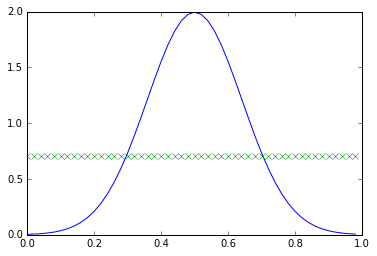

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,u0)
plt.ylim(0,2)
plt.plot(x, u, 'x')